# Pearson Correlation Analysis on Human Phenotype and Human Expression
## _Author(s): Wai Yuen (Wylliam) Cheng_

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import os
import sys
from tqdm import tqdm
import seaborn as sns

In [154]:
df_human_expression = pd.read_csv(f"{os.getcwd()}/../BE700_human_expression.(1) (1) (1).csv", index_col=0).T

#### Gene to Gene Correlation

In [155]:
print("Calculating the correlation matrix...")
gene_corr_matrix = df_human_expression.corr(method="pearson")
print("\nCorrelation matrix calculation completed:")
print(gene_corr_matrix)

Calculating the correlation matrix...

Correlation matrix calculation completed:
               NaN      A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1  \
NaN       1.000000 -0.096131  0.170948  0.327504  0.316236 -0.069708   
A1BG     -0.096131  1.000000 -0.048833  0.115870 -0.073043  0.140097   
A1BG-AS1  0.170948 -0.048833  1.000000  0.032407  0.136530 -0.121870   
A1CF      0.327504  0.115870  0.032407  1.000000  0.173844 -0.061902   
A2M       0.316236 -0.073043  0.136530  0.173844  1.000000 -0.073398   
...            ...       ...       ...       ...       ...       ...   
ZYG11A    0.491362  0.069250  0.169247  0.219432  0.134438  0.026301   
ZYG11B   -0.284774  0.167787  0.152396 -0.143135  0.000571  0.176592   
ZYX       0.226131  0.076865  0.191673  0.078223  0.327849 -0.359793   
ZZEF1     0.332895  0.028947  0.118795  0.134240  0.110295 -0.103345   
ZZZ3     -0.000778 -0.055216 -0.341359 -0.171477 -0.349359  0.094406   

             A2ML1     A2MP1    A4GALT     A4GNT  ... 

##### Saving Correlation of Gene2Gene

In [156]:
## Saving Correlation Coefficients
gene_corr_matrix.to_hdf("../human_expression_pearson_corr.h5", key="gene_pearson_corr")

/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_22503/1933499816.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis0] [items->None]

  gene_corr_matrix.to_hdf("../human_expression_pearson_corr.h5", key="gene_pearson_corr")
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_22503/1933499816.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis1] [items->None]

  gene_corr_matrix.to_hdf("../human_expression_pearson_corr.h5", key="gene_pearson_corr")
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_22503/1933499816.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_items] [items->None]

  gene_corr_matrix.to_hdf("../human_expressio

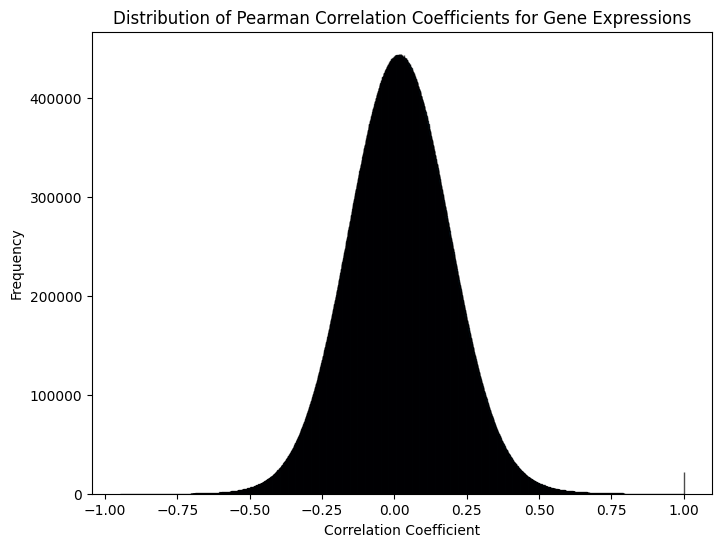

In [168]:
corr_coe = gene_corr_matrix.values.flatten()
plt.figure(figsize=(8, 6))
plt.hist(corr_coe, bins=5000, edgecolor='k', alpha=0.7)
plt.title("Distribution of Pearman Correlation Coefficients for Gene Expressions")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.show()

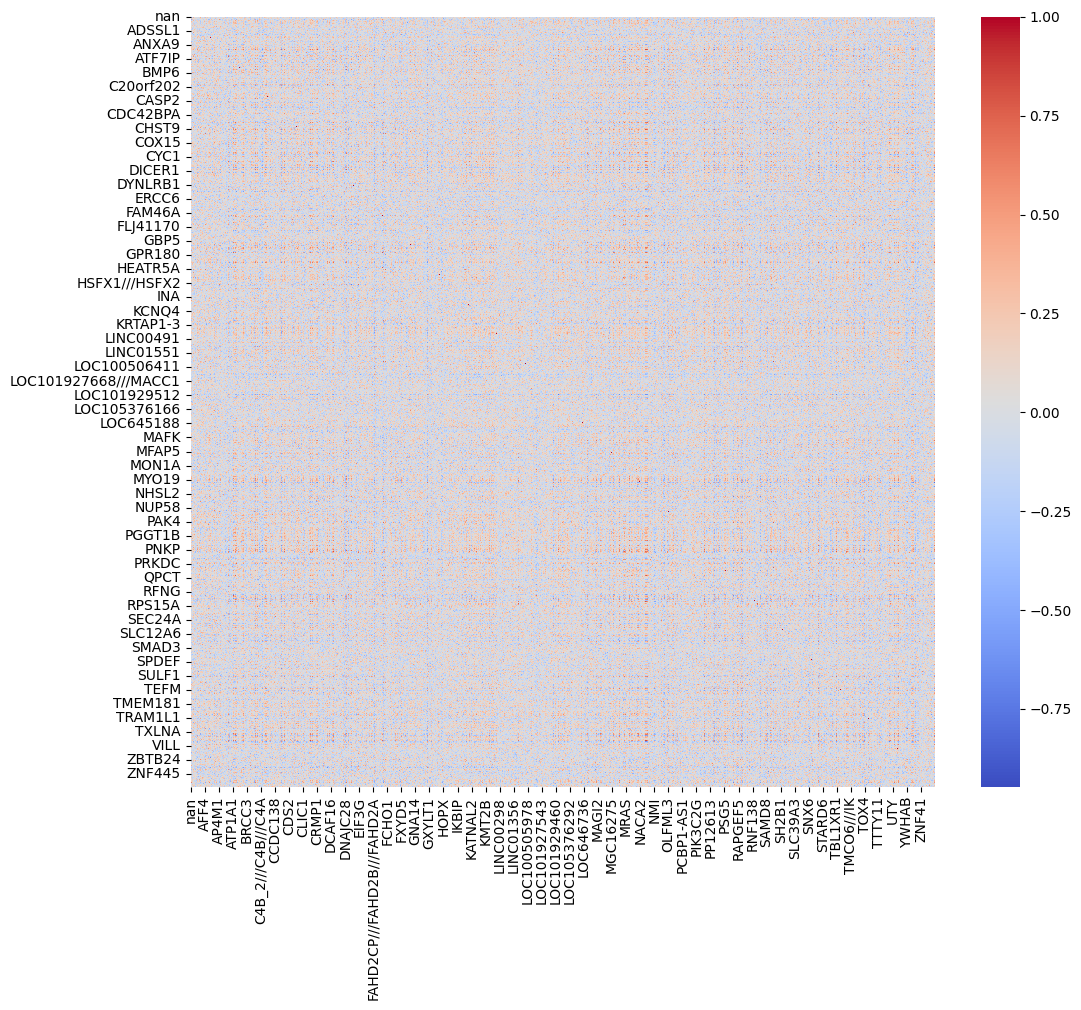

In [158]:
plt.figure(figsize=(12, 10))
sns.heatmap(gene_corr_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.show()
# plt.colorbar(label='Normalized Expression Level')
# plt.title('Heatmap of Gene Expression Data (K-means Clustered Order)')
# plt.xlabel('Samples')
# plt.ylabel('Genes (K-means Clustered)')
# plt.show()

In [159]:
gene_corr_matrix

,NaN,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,...,ZWINT,ZXDA,ZXDB,ZXDB///ZXDA,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
NaN,1.000000,-0.096131,0.170948,0.327504,0.316236,-0.069708,0.340478,0.427270,0.296652,0.225041,...,0.244827,-0.137929,-0.320301,0.277294,0.166033,0.491362,-0.284774,0.226131,0.332895,-0.000778
A1BG,-0.096131,1.000000,-0.048833,0.115870,-0.073043,0.140097,-0.114785,-0.040996,-0.015187,0.055297,...,0.085744,0.283640,0.000938,0.094308,-0.214863,0.069250,0.167787,0.076865,0.028947,-0.055216
A1BG-AS1,0.170948,-0.048833,1.000000,0.032407,0.136530,-0.121870,0.191264,0.095392,0.097444,0.087003,...,-0.307085,0.005931,-0.059026,0.190152,0.031129,0.169247,0.152396,0.191673,0.118795,-0.341359
A1CF,0.327504,0.115870,0.032407,1.000000,0.173844,-0.061902,0.350159,0.059188,0.222689,0.036791,...,0.212005,-0.015829,0.039288,0.053894,0.004475,0.219432,-0.143135,0.078223,0.134240,-0.171477
A2M,0.316236,-0.073043,0.136530,0.173844,1.000000,-0.073398,0.225407,0.155477,0.194709,0.127570,...,0.135605,-0.188346,-0.089856,0.088311,-0.159876,0.134438,0.000571,0.327849,0.110295,-0.349359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.491362,0.069250,0.169247,0.219432,0.134438,0.026301,0.205915,0.161588,0.093457,-0.139236,...,0.033033,0.011932,-0.146222,0.069753,0.234354,1.000000,-0.064857,0.032184,0.151480,0.138058
ZYG11B,-0.284774,0.167787,0.152396,-0.143135,0.000571,0.176592,-0.325166,-0.333975,-0.027290,-0.177098,...,-0.206992,0.234817,-0.012894,-0.189955,-0.181165,-0.064857,1.000000,-0.315901,-0.121646,0.012625
ZYX,0.226131,0.076865,0.191673,0.078223,0.327849,-0.359793,0.339709,0.250957,0.127502,0.439220,...,0.138688,-0.291408,-0.108725,0.303287,-0.271506,0.032184,-0.315901,1.000000,-0.113624,-0.630163
ZZEF1,0.332895,0.028947,0.118795,0.134240,0.110295,-0.103345,0.262436,0.229352,0.187707,0.225374,...,0.035905,0.278697,-0.247018,-0.067743,0.161887,0.151480,-0.121646,-0.113624,1.000000,0.133003


**We further filter the genes to be analyzed by the scale of correlation.**

We make all the value of the correlation plot positive first by using `abs()` function. Then sum the correlation of each gene expression to all other genes they correlated to, excluding the correlation with themselves. Then we rank the scale of correlation sum. The top 100 will be plotted below.

In [160]:
np_gene_corr_matrix = np.array(gene_corr_matrix)
np_gene_corr_matrix

array([[ 1.00000000e+00, -9.61310619e-02,  1.70947802e-01, ...,
         2.26130754e-01,  3.32894904e-01, -7.77913875e-04],
       [-9.61310619e-02,  1.00000000e+00, -4.88330081e-02, ...,
         7.68647567e-02,  2.89466936e-02, -5.52164966e-02],
       [ 1.70947802e-01, -4.88330081e-02,  1.00000000e+00, ...,
         1.91673302e-01,  1.18794916e-01, -3.41359088e-01],
       ...,
       [ 2.26130754e-01,  7.68647567e-02,  1.91673302e-01, ...,
         1.00000000e+00, -1.13624456e-01, -6.30163356e-01],
       [ 3.32894904e-01,  2.89466936e-02,  1.18794916e-01, ...,
        -1.13624456e-01,  1.00000000e+00,  1.33003481e-01],
       [-7.77913875e-04, -5.52164966e-02, -3.41359088e-01, ...,
        -6.30163356e-01,  1.33003481e-01,  1.00000000e+00]])

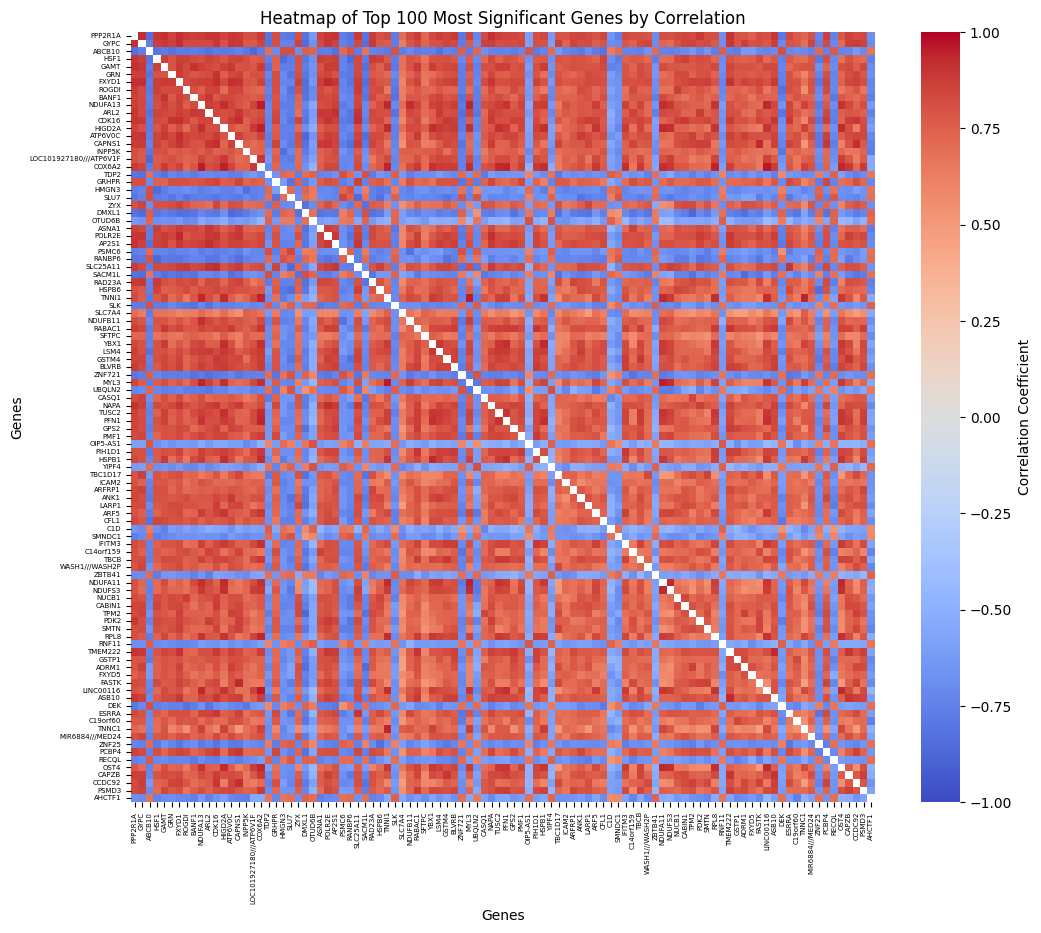

In [161]:
np.fill_diagonal(np_gene_corr_matrix, np.nan)

correlation_sums = np.nansum(np.abs(np_gene_corr_matrix), axis=1)

top_100_genes = np.argsort(-correlation_sums)[:100]

top_100_gene_symbols = gene_corr_matrix.columns[top_100_genes].tolist()

top_100_correlation_matrix = np_gene_corr_matrix[np.ix_(top_100_genes, top_100_genes)]

plt.figure(figsize=(12, 10))
sns.heatmap(top_100_correlation_matrix, 
            xticklabels=top_100_gene_symbols, 
            yticklabels=top_100_gene_symbols, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap of Top 100 Most Significant Genes by Correlation")
plt.xlabel("Genes")
plt.ylabel("Genes")
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

In [162]:
print(f"The selected genes from this method: {top_100_gene_symbols}")

The selected genes from this method: ['PPP2R1A', 'GYPC', 'ABCB10', 'HSF1', 'GAMT', 'GRN', 'FXYD1', 'ROGDI', 'BANF1', 'NDUFA13', 'ARL2', 'CDK16', 'HIGD2A', 'ATP6V0C', 'CAPNS1', 'INPP5K', 'LOC101927180///ATP6V1F', 'COX6A2', 'TDP2', 'GRHPR', 'HMGN3', 'SLU7', 'ZYX', 'DMXL1', 'OTUD6B', 'ASNA1', 'POLR2E', 'AP2S1', 'PSMC6', 'RANBP6', 'SLC25A11', 'SACM1L', 'RAD23A', 'HSPB6', 'TNNI1', 'SLK', 'SLC7A4', 'NDUFB11', 'RABAC1', 'SFTPC', 'YBX1', 'LSM4', 'GSTM4', 'BLVRB', 'ZNF721', 'MYL3', 'UBQLN2', 'CASQ1', 'NAPA', 'TUSC2', 'PFN1', 'GPS2', 'PMF1', 'OIP5-AS1', 'PIH1D1', 'HSPB1', 'YIPF4', 'TBC1D17', 'ICAM2', 'ARFRP1', 'ANK1', 'LARP1', 'ARF5', 'CFL1', 'C1D', 'SMNDC1', 'IFITM3', 'C14orf159', 'TBCB', 'WASH1///WASH2P', 'ZBTB41', 'NDUFA11', 'NDUFS3', 'NUCB1', 'CABIN1', 'TPM2', 'PDK2', 'SMTN', 'RPL8', 'RNF11', 'TMEM222', 'GSTP1', 'ADRM1', 'FXYD5', 'FASTK', 'LINC00116', 'ASB10', 'DEK', 'ESRRA', 'C19orf60', 'TNNC1', 'MIR6884///MED24', 'ZNF25', 'PCBP4', 'RECQL', 'OST4', 'CAPZB', 'CCDC92', 'PSMD3', 'AHCTF1']


***

#### Gene to Phenotype Correlation

This section would be carried out to check the correlations between gene expression and continuous phenotype data

In [163]:
df_human_pheno = pd.read_csv(f"{os.getcwd()}/../human_pheno_postprocessed.csv", index_col=0)

In [164]:
df_cont_pheno = df_human_pheno.drop(columns=["family history:ch1", "gender:ch1", "diabete_2"])

**_There are missing data in the table. We can do either data imputation with the assistance of KNNImputer or completely removing those data. For the purpose of analysis, we will simply remove them to see the overall trend without patterns in data that we assumed to exist._**

In [165]:
df_cont_pheno.dropna(inplace=True)
df_cont_pheno

,2 hour glucose (ogtt):ch1,age (years):ch1,body mass index (kg/m2):ch1,fasting glucose (iv0gavg):ch1,fasting glucose (ogtt):ch1,fasting insulin (iv0inavg):ch1,hemoglobin a1c:ch1,si:ch1,waist hip ratio:ch1
GSM624925,125.0,39,20,90,85.0,2.7,5.6,11.91,1.364
GSM624926,112.0,23,23,87,84.5,4.4,5.0,8.31,0.792
GSM624927,124.0,42,21,79,67.0,6.1,4.6,1.59,0.824
GSM624928,150.0,40,27,91,103.0,5.6,5.1,8.38,0.981
GSM624930,90.0,23,25,91,77.0,8.0,4.3,6.53,0.833
GSM624931,77.0,46,26,88,85.5,4.4,5.4,10.39,0.845
GSM624932,58.0,28,24,83,78.5,1.7,4.7,14.28,0.865
GSM624933,38.0,38,25,88,91.5,4.6,5.1,10.29,0.902
GSM624934,146.0,50,33,109,105.0,15.9,5.4,1.70,1.018
GSM624935,99.0,24,24,95,92.0,4.8,4.2,4.19,0.832


In [166]:
## We would then have to remove the rows of same sample in the df_human_expression as well

dropped_sample_gsm = df_human_pheno[df_human_pheno.isna().any(axis=1)].index
df_human_expression_filtered = df_human_expression.drop(index=dropped_sample_gsm)
print(f"shape match: {df_human_expression_filtered.shape[0] == df_cont_pheno.shape[0]}")

shape match: True


In [167]:
pheno_expression_corr = pd.DataFrame(index=df_human_expression_filtered.columns, columns=df_cont_pheno.columns)

for col1 in df_human_expression_filtered.columns:
    for col2 in df_cont_pheno.columns:
        pheno_expression_corr.loc[col1, col2] = df_human_expression_filtered[col1].corr(df_cont_pheno[col2], method='pearson')

pheno_expression_corr = pheno_expression_corr.astype(float)
pheno_expression_corr

,2 hour glucose (ogtt):ch1,age (years):ch1,body mass index (kg/m2):ch1,fasting glucose (iv0gavg):ch1,fasting glucose (ogtt):ch1,fasting insulin (iv0inavg):ch1,hemoglobin a1c:ch1,si:ch1,waist hip ratio:ch1
NaN,-0.097937,-0.076369,-0.024461,-0.020159,-0.132044,-0.108025,-0.342912,-0.028464,-0.064714
A1BG,-0.041542,-0.263412,0.127202,0.095751,0.017505,0.124740,-0.054453,-0.090352,-0.092332
A1BG-AS1,0.022190,0.149806,0.085010,-0.140474,0.072789,0.191815,-0.084077,-0.073633,0.286197
A1CF,0.200948,0.096598,0.035873,0.117793,0.321744,0.215171,0.103855,-0.271442,0.265318
A2M,-0.144302,-0.082077,-0.377519,-0.210604,-0.133838,-0.151989,-0.250808,0.030270,-0.102044
...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.207742,0.130226,0.177023,0.135498,0.061894,-0.036683,-0.106255,0.206928,0.325540
ZYG11B,0.034083,-0.138540,0.407653,0.153913,0.210026,0.293446,0.172329,-0.084754,-0.132033
ZYX,0.196909,-0.329353,-0.212531,-0.116645,-0.075021,0.111818,-0.143258,-0.085566,0.164103
ZZEF1,0.097167,0.227766,-0.079785,0.197531,0.114707,-0.014112,0.122737,0.047122,0.170221


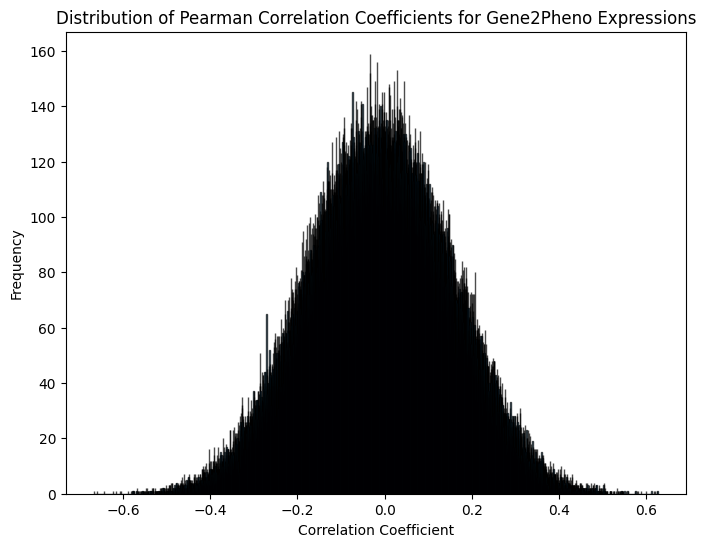

In [169]:
corr_coe = pheno_expression_corr.values.flatten()
plt.figure(figsize=(8, 6))
plt.hist(corr_coe, bins=5000, edgecolor='k', alpha=0.7)
plt.title("Distribution of Pearman Correlation Coefficients for Gene2Pheno Expressions")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.show()

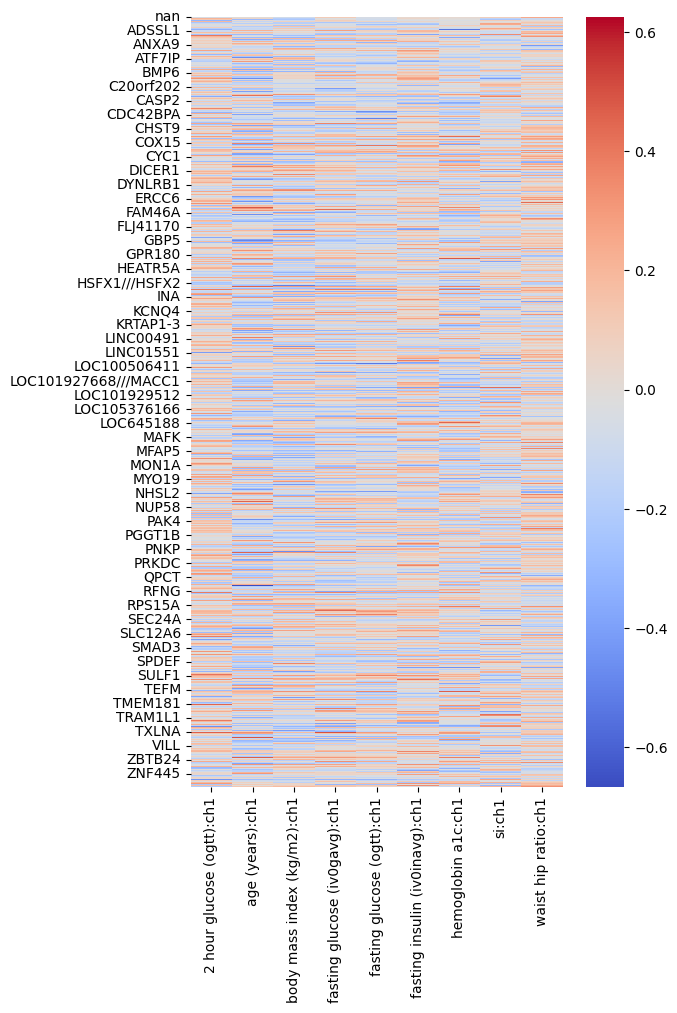

In [170]:
plt.figure(figsize=(6, 10))
sns.heatmap(pheno_expression_corr, annot=False, cmap="coolwarm", cbar=True)
plt.show()

**Again, we further filter the genes to be analyzed by the scale of correlation.**

We make all the value of the correlation plot positive first by using `abs()` function. Then sum the correlation of each gene expression to all other genes they correlated to, excluding the correlation with themselves. Then we rank the scale of correlation sum. The 100 genes with highest correlations with the phenotypes will be plotted below.

In [171]:
np_pheno_expression_corr = np.array(pheno_expression_corr)
np_pheno_expression_corr

array([[-0.09793664, -0.07636877, -0.02446098, ..., -0.34291162,
        -0.02846415, -0.06471376],
       [-0.04154163, -0.26341194,  0.12720246, ..., -0.05445312,
        -0.09035238, -0.0923318 ],
       [ 0.02218997,  0.14980648,  0.08500963, ..., -0.08407686,
        -0.07363335,  0.28619716],
       ...,
       [ 0.1969087 , -0.32935306, -0.21253086, ..., -0.14325841,
        -0.08556643,  0.16410273],
       [ 0.09716674,  0.22776636, -0.07978529, ...,  0.12273721,
         0.04712232,  0.17022055],
       [-0.09138823,  0.27835591,  0.20875373, ...,  0.10928381,
        -0.00932686, -0.21086701]])

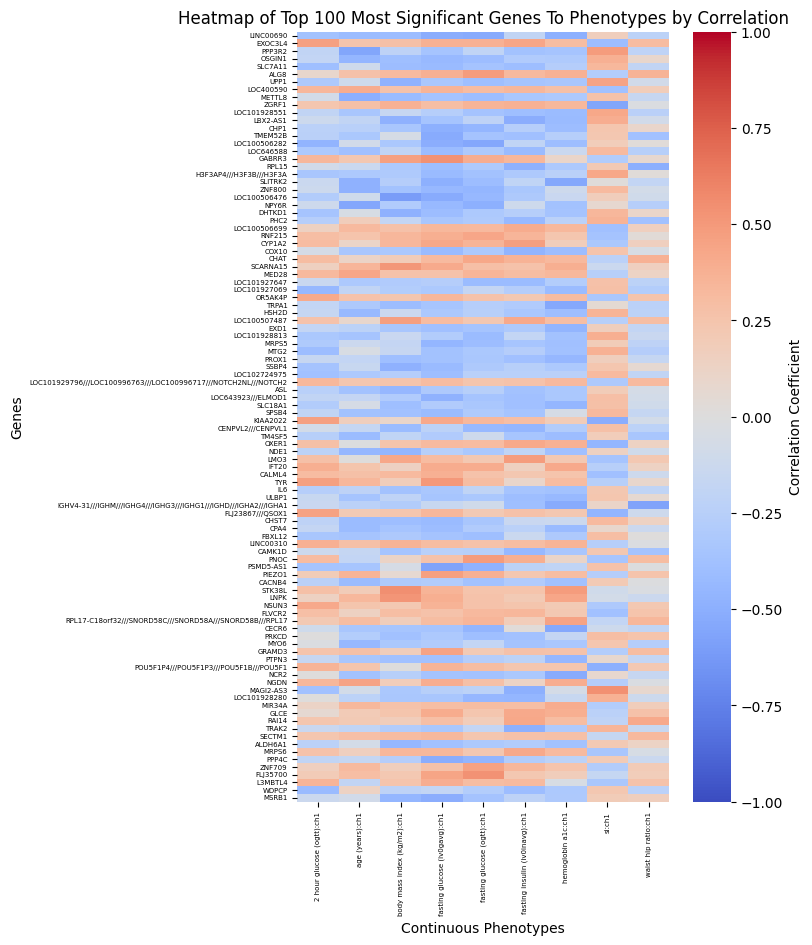

In [172]:
# np.fill_diagonal(np_pheno_expression_corr, np.nan)

correlation_sums = np.nansum(np.abs(np_pheno_expression_corr), axis=1)

top_100_genepheno = np.argsort(-correlation_sums)[:100]

top_100_genepheno_symbols = pheno_expression_corr.T.columns[top_100_genepheno].tolist()

top_100_genepheno_correlation_matrix = np_pheno_expression_corr[top_100_genepheno]

plt.figure(figsize=(6, 10))
sns.heatmap(top_100_genepheno_correlation_matrix, 
            xticklabels=list(df_cont_pheno.columns), 
            yticklabels=top_100_genepheno_symbols, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap of Top 100 Most Significant Genes To Phenotypes by Correlation")
plt.xlabel("Continuous Phenotypes")
plt.ylabel("Genes")
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

##### Saving Correlation of Gene2Pheno

In [173]:
pheno_expression_corr.to_hdf("../gene_to_phenotype_pearson_corr.h5", key="gene2pheno_pearson_corr")

/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_22503/1113608438.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis1] [items->None]

  pheno_expression_corr.to_hdf("../gene_to_phenotype_pearson_corr.h5", key="gene2pheno_pearson_corr")


## Saving Both Top 100 Results

In [176]:
pd.DataFrame(top_100_correlation_matrix, columns=top_100_gene_symbols, index=top_100_gene_symbols).to_hdf("../human_expression_pearson_corr_top100.h5", key="gene_pearson_corr")
pd.DataFrame(top_100_genepheno_correlation_matrix, columns=list(df_cont_pheno.columns), index=top_100_genepheno_symbols).to_hdf("../gene_to_phenotype_pearson_corr_top100.h5", key="gene2pheno_pearson_corr")

## Comparison of top 100 Gene Extractions from Correlation

In [179]:
top_100_genepheno_symbols

['LINC00690',
 'EXOC3L4',
 'PPP3R2',
 'OSGIN1',
 'SLC7A11',
 'ALG8',
 'UPP1',
 'LOC400590',
 'METTL8',
 'ZGRF1',
 'LOC101928551',
 'LBX2-AS1',
 'CHP1',
 'TMEM52B',
 'LOC100506282',
 'LOC646588',
 'GABRR3',
 'RPL15',
 'H3F3AP4///H3F3B///H3F3A',
 'SLITRK2',
 'ZNF800',
 'LOC100506476',
 'NPY6R',
 'DHTKD1',
 'PHC2',
 'LOC100506699',
 'RNF215',
 'CYP1A2',
 'COX10',
 'CHAT',
 'SCARNA15',
 'MED28',
 'LOC101927647',
 'LOC101927069',
 'OR5AK4P',
 'TRPA1',
 'HSH2D',
 'LOC100507487',
 'EXD1',
 'LOC101928813',
 'MRPS5',
 'MTG2',
 'PROX1',
 'SSBP4',
 'LOC102724975',
 'LOC101929796///LOC100996763///LOC100996717///NOTCH2NL///NOTCH2',
 'ASL',
 'LOC643923///ELMOD1',
 'SLC18A1',
 'SPSB4',
 'KIAA2022',
 'CENPVL2///CENPVL1',
 'TM4SF5',
 'OXER1',
 'NDE1',
 'LMO3',
 'IFT20',
 'CALML4',
 'TYR',
 'IL6',
 'ULBP1',
 'IGHV4-31///IGHM///IGHG4///IGHG3///IGHG1///IGHD///IGHA2///IGHA1',
 'FLJ23867///QSOX1',
 'CHST7',
 'CPA4',
 'FBXL12',
 'LINC00310',
 'CAMK1D',
 'PNOC',
 'PSMD5-AS1',
 'PIEZO1',
 'CACNB4',
 'STK38L',


In [180]:
top_100_gene_symbols

['PPP2R1A',
 'GYPC',
 'ABCB10',
 'HSF1',
 'GAMT',
 'GRN',
 'FXYD1',
 'ROGDI',
 'BANF1',
 'NDUFA13',
 'ARL2',
 'CDK16',
 'HIGD2A',
 'ATP6V0C',
 'CAPNS1',
 'INPP5K',
 'LOC101927180///ATP6V1F',
 'COX6A2',
 'TDP2',
 'GRHPR',
 'HMGN3',
 'SLU7',
 'ZYX',
 'DMXL1',
 'OTUD6B',
 'ASNA1',
 'POLR2E',
 'AP2S1',
 'PSMC6',
 'RANBP6',
 'SLC25A11',
 'SACM1L',
 'RAD23A',
 'HSPB6',
 'TNNI1',
 'SLK',
 'SLC7A4',
 'NDUFB11',
 'RABAC1',
 'SFTPC',
 'YBX1',
 'LSM4',
 'GSTM4',
 'BLVRB',
 'ZNF721',
 'MYL3',
 'UBQLN2',
 'CASQ1',
 'NAPA',
 'TUSC2',
 'PFN1',
 'GPS2',
 'PMF1',
 'OIP5-AS1',
 'PIH1D1',
 'HSPB1',
 'YIPF4',
 'TBC1D17',
 'ICAM2',
 'ARFRP1',
 'ANK1',
 'LARP1',
 'ARF5',
 'CFL1',
 'C1D',
 'SMNDC1',
 'IFITM3',
 'C14orf159',
 'TBCB',
 'WASH1///WASH2P',
 'ZBTB41',
 'NDUFA11',
 'NDUFS3',
 'NUCB1',
 'CABIN1',
 'TPM2',
 'PDK2',
 'SMTN',
 'RPL8',
 'RNF11',
 'TMEM222',
 'GSTP1',
 'ADRM1',
 'FXYD5',
 'FASTK',
 'LINC00116',
 'ASB10',
 'DEK',
 'ESRRA',
 'C19orf60',
 'TNNC1',
 'MIR6884///MED24',
 'ZNF25',
 'PCBP4',
 'R

In [182]:
gene2pheno_set = set(top_100_genepheno_symbols)
gene_set = set(top_100_gene_symbols)

overlap = set(gene2pheno_set) & set(gene_set)
overlap_count = len(overlap)

print(f"Overlapping elements: {overlap}")
print(f"Number of overlapping elements: {overlap_count}")

Overlapping elements: set()
Number of overlapping elements: 0


**No overlapping genes at all: indicates the nodal genes in biological networks (those causing biggest fluctuation in other gene expressions) are not the genes with highly influences over phenotypical changes.**